# Υποχρεωτική εργασία Υπολογιστικής Γεωμετρίας Σεπτεμβρίου <br> Ονοματεπώνυμο: Μιχαήλ Αρετάκης <br> Αριθμός Μητρώου: 1115202100007

<u>**ΣΗΜΑΝΤΙΚΗ ΠΑΡΑΤΗΡΗΣΗ:**</u> Επειδή δεν βρίσκονται όλες οι συναρτήσεις στο ίδιο μπλοκ κώδικα, καλό είναι τα μπλοκς να εκτελεστούν με τη σειρά. Αν θέλουμε να εκτελέσουμε ένα μπλοκ κώδικα που περιέχει μια συνάρτηση που δεν έχει εκτελεστεί ακόμα, πρέπει πρώτα να εκτελέσουμε το μπλοκ της συνάρτησης και μετά το μπλοκ που θέλουμε.

Aν χαθεί η σύνδεση στη σελίδα ή την ανανεώσουμε, πρέπει να μπλοκ να εκτελεστούν από την αρχή.

## Υλοποίηση Α: Κυρτό περίβλημα

* <u>Ερώτημα 1:</u>
Για να εκτελέσουμε τους αλγορίθμους τρέχουμε αρχικά το πρώτο μπλοκ κώδικα για να παραχθούν n τυχαία σημεία και έπειτα εκτελόυμε τον αλγόριθμο που θέλουμε.

* <u>Ερώτημα 2:</u> Στη συνάρτηση *generate_random_points* στο πρώτο μπλοκ κώδικα θέτουμε το n ίσο με 120 και εκτελούμε έναν έναν τους αλγόριθμους. Από τις γραφικές παραστάσεις παρατηρούμε πως περίβλημα που σχηματίστηκε είναι ίδιο και στις 4 περιπτώσεις και περιλαμβάνει όλα τα σημεία του συνόλου.

* <u>Ερώτημα 3:</u> Δες μετά την υλοποίηση της *QuickHull*.

Η εκτέλεση αυτού του κώδικα παράγει n αριθμό τυχαίων σημείων μέσα στα όρια που έχουμε δώσει και τα παρουσιάζει γραφικά.

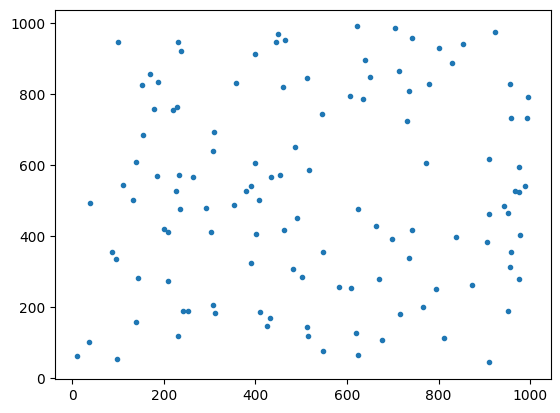

In [ ]:
import matplotlib.pyplot as plt
import random

# Generate n random points
def generateRandomPoints(n, upper_bound, lower_bound=0):
    points = [(random.randint(lower_bound, upper_bound), random.randint(lower_bound, upper_bound)) for _ in range(n)]
    return points

# Dislay points
points = generateRandomPoints(120, 1000)
plt.figure()
plt.plot([p[0] for p in points], [p[1] for p in points], 'o', markersize=3)
plt.show()

### Αυξητικός αλγόριθμος

Χρησιμοποιώντας τα ακραία σημεία του άξονα $x$ και το κατηγόρημα του προσανατολισμού βρίσκουμε το άνω και το κάτω περίβλημα.

Συγκεκριμένα παίρνουμε τα σημεία που είναι ταξινομημένα λεξικογραφικά και ελέγχουμε σε 3άδες με τη σειρά αν σχηματίζουν δεξιά στροφή ή όχι χτίζοντας έτσι σιγά σιγά το άνω περίβλημα μέχρι να φτάσουμε από το ένα ακραίο σημείο στο άλλο.

Με παρόμοιο τρόπο βρίσκουμε το κάτω περίβλημα, μόνο που ελέγχουμε τα σημεία με την αντίστροφη σειρά.

Execution time: 0.9479522705078125 milliseconds



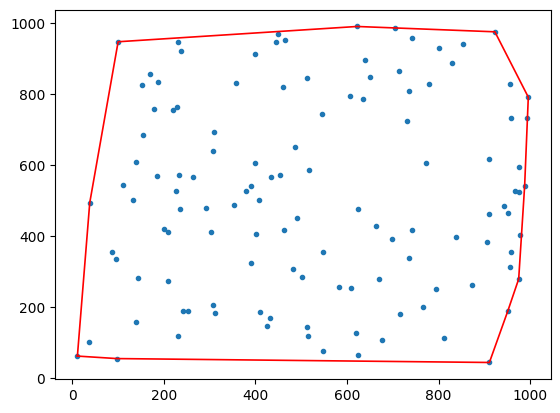

In [ ]:
import matplotlib.pyplot as plt
import time

# Find orientation
def orientation(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

# Function to check if the orientation is ClockWise (CW)
def CW(p1, p2, p3):
    return orientation(p1, p2, p3) < 0

# Incremental Algorithm
def incrementalConvexHull(points):
    # Sort the points lexicographically
    points = sorted(points)

    # Build the upper hull
    upper_hull = []
    for p in points:
        upper_hull.append(p)
        # Remove the middle point of the last three if they don't form a right turn
        while len(upper_hull) > 2 and not CW(upper_hull[-3], upper_hull[-2], upper_hull[-1]):
            upper_hull.pop(-2)

    # Build the lower hull
    lower_hull = []
    for p in reversed(points):
        lower_hull.append(p)
        # Remove the middle point of the last three if they don't form a right turn
        while len(lower_hull) > 2 and not CW(lower_hull[-3], lower_hull[-2], lower_hull[-1]):
            lower_hull.pop(-2)

    # Remove first and last point to avoid duplicates (both halfs have those points)
    del lower_hull[0]
    del lower_hull[-1]

    # Combine upper and lower hull to get the full convex hull
    return upper_hull + lower_hull

# Function to plot the points and the convex hull
def plotConvexHull(points, hull):
    plt.figure()
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o', markersize=3)

    # Draw the convex hull
    hull_points = hull + [hull[0]]  # Append the first point to close the hull
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'r-', linewidth=1.2)

    plt.show()


start_time = time.time()
hull = incrementalConvexHull(points)  # Calculate the convex hull
exec_time = time.time() - start_time

print(f"Execution time: {exec_time*1000} milliseconds\n")   # Print execution time
plotConvexHull(points, hull)    # Plot the points and the convex hull


### Αλγόριθμο του περιτυλίγματος

Ο συγκεκριμένος αλγόριθμος ξεκινάει από το μικρότερο λεξικογραφικά σημείο και επιλέγει ένα τυχαίο σημείο ως το επόμενο που θα μπει στο περίβλημα. Με το κατηγόρημα του προσανατολισμού ελέγχουμε αν σχηματίζουν δεξιά στροφή το τελευταίο σημείο του περιβλήματος και το υποψήφιο σημείο που είναι να μπει στο περίβλημα, με τα υπόλοιπα σημεία. Αν σχηματίζεται δεξιά γωνία τότε υπάρχει σημείο που βελτιώνει το περίβλημα μας. Αφού καταλήξουμε στο καλύτερο υποψήφιο σημείο το εισάγουμε στο περίβλημα και επαναλαμβάνουμε τη διαδικασία μέχρι να κάνουμε κύκλο και επιστρέψουμε πίσω στο αρχικό σημείο του περθιβλήματος.

Execution time: 1.081705093383789 milliseconds



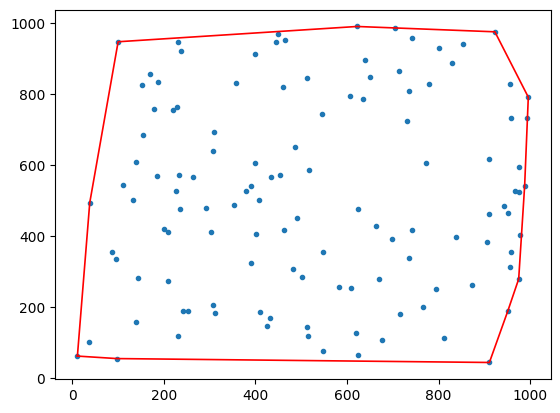

In [ ]:
import matplotlib.pyplot as plt
import time

# Find orientation
def orientation(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

# Function to check if the orientation is ClockWise (CW)
def CW(p1, p2, p3):
    return orientation(p1, p2, p3) < 0

# Gift Wrapping Algorithm
def giftWrappingConvexHull(points):
    # Initialize the convex hull
    hull = []

    # Find the point with the smallest x (and y in case of tie)
    r0 = min(points, key=lambda p: (p[0], p[1]))
    r = r0  # it's the first point to be added to the hull

    while True:
        # Add point to the hull
        hull.append(r)
        # Select an arbitrary point as the next candidate
        candidate = points[0]

        for curr_point in points[1:]:
            # If candidate is the point we just added to hull or we found a better candidate
            if candidate == r or CW(r, candidate, curr_point):
                candidate = curr_point

        r = candidate  # Found the best fitting candidate

        # If we've wrapped back to the start, the hull is complete
        if r == r0:
            break

    return hull

# Function to plot the points and the convex hull
def plotConvexHull(points, hull):
    plt.figure()
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o', markersize=3)

    # Draw the convex hull
    hull_points = hull + [hull[0]]  # Append the first point to close the hull
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'r-', linewidth=1.2)

    plt.show()


start_time = time.time()
hull = giftWrappingConvexHull(points)    # Calculate the convex hull
exec_time = time.time() - start_time

print(f"Execution time: {exec_time*1000} milliseconds\n")   # Print execution time
plotConvexHull(points, hull)    # Plot the points and the convex hull

### Αλγόριθμο Διαίρει και Βασίλευε

Ο αλγόριθμος σπάει το πλήθος τον σημείων στη μέση αναδρομικά, μέχρι να φτάσει σε αρκετό μικρό αριθμό σημείων και χρησιμοποιεί τον αυξητικό αλγόριθμο (που υλοποιήσαμε πιο πάνω) για να βρεί το περίβλημα του. Έπειτα η ένωση των δυο περιβλημάτων γίνεται μέσω της συνάρτησης merge.

Η συνάρτηση αυτή βρίσκει το ζευγάρι των σημείων στο άνω και κάτω μέρος των περιβλημάτων που θα ενώσουμε για να τα ενώσουμε μεταξύ τους. Συγκεκριμένα, με τη βοήθεια του κατηγορήματος του προσανατολισμού, ψάχνουμε να βρούμε το ζευγάρι των σημείων που αν πάρουμε το προσανατολισμό που σχηματίζει μαζί με ένα σημείο του ενός συνόλου, τότε αυτά και τα υπόλοιπα σημεία του συνόλου αυτού βρίσκονται στον ίδιο ημιχώρο.

Τέλος, σχηματίζει το περίβλημα όλων των σημείων και το επιστρέφει.

Execution time: 1.268625259399414 milliseconds



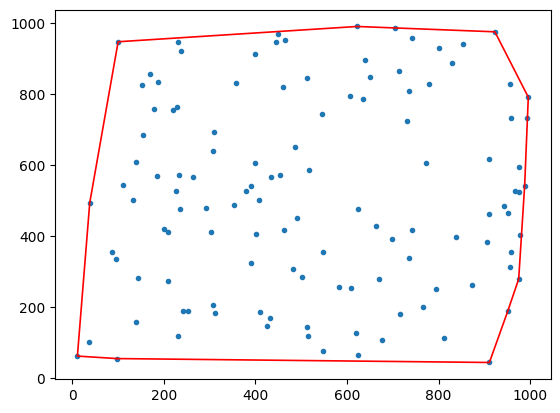

In [ ]:
import matplotlib.pyplot as plt
import time

# Find orientation
def orientation(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

# Function to check if the orientation is ClockWise (CW)
def CW(p1, p2, p3):
    return orientation(p1, p2, p3) < 0

# Function to check if the orientation is CounterClockWise (CCW)
def CCW(p1, p2, p3):
    return orientation(p1, p2, p3) > 0

# Merges two convex hulls
def merge(a, b):
    n1, n2 = len(a), len(b)
    ia, ib = 0, 0

    # Find rightmost point of a
    for i in range(1, n1):
        if a[i][0] > a[ia][0]:
            ia = i

    # Find leftmost point of b
    for i in range(1, n2):
        if b[i][0] < b[ib][0]:
            ib = i

    """
    NOTE: Points are sorted ClockWise
    """
    # Find upper tangent
    upper_a = ia
    upper_b = ib
    while True:
        changed = False

        # If points B, A[i], A[i-1] don't have CCW orientation:
        while not CCW(b[upper_b], a[upper_a], a[(upper_a+n1-1) % n1]):
            upper_a = (upper_a+n1-1) % n1   # Decrement A[i] by one
            changed = True

        # If points A, B[i], B[i+1] don't have CW orientation:
        while not CW(a[upper_a], b[upper_b], b[(upper_b+1) % n2]):
            upper_b = (upper_b+1) % n2      # Increment B[i] by one
            changed = True

        if not changed:
            break

    # Find lower tangent
    lower_a = ia
    lower_b = ib
    while True:
        changed = False

        # If points B, A[i], A[i+1] don't have a CW orientation:
        while not CW(b[lower_b], a[lower_a], a[(lower_a+1) % n1]):
            lower_a = (lower_a+1) % n1      # Increment A[i] by one
            changed = True

        # If points A, B[i], B[i+1] don't have a CCW orientation:
        while not CCW(a[lower_a], b[lower_b], b[(lower_b+n2-1) % n2]):
            lower_b = (lower_b+n2-1) % n2   # Decrement B[i] by one
            changed = True

        if not changed:
            break

    # Merge the two hulls
    hull = []

    # Start from the lower point of A and move upwards (points are sorted CW)
    i = lower_a
    hull.append(a[lower_a])
    while i != upper_a:
        i = (i+1) % n1
        hull.append(a[i])

    # Start from the upper point of B and move downwards (points are sorted CW)
    i = upper_b
    hull.append(b[upper_b])
    while i != lower_b:
        i = (i+1) % n2
        hull.append(b[i])

    return hull  # Return the merged hull

def divideConvexHull(points):
    # If we have 5 or less points use incremental algorithm to find convex hull
    if len(points) <=5:
      return incrementalConvexHull(points)

    # Sort the points lexicographically
    points = sorted(points)

    left, right = [], []

    # Split the points into two halves
    for i in range(int(len(points)/2)):
        left.append(points[i])
    for i in range(int(len(points)/2), len(points)):
        right.append(points[i])

    # Recursively find the convex hulls of the two halves
    left_hull = divideConvexHull(left)
    right_hull = divideConvexHull(right)

    # Merge the two convex hulls
    return merge(left_hull, right_hull)

# Function to plot the points and the convex hull
def plotConvexHull(points, hull):
    plt.figure()
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o', markersize=3)

    # Draw the convex hull
    hull_points = hull + [hull[0]]  # Append the first point to close the hull
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'r-', linewidth=1.2)

    plt.show()


start_time = time.time()
hull = divideConvexHull(points)   # Calculate the convex hull
exec_time = time.time() - start_time

print(f"Execution time: {exec_time*1000} milliseconds\n")   # Print execution time
plotConvexHull(points, hull)    # Plot the points and the convex hull

### Αλγόριθμο QuickHull

Ο αλγόριθμος αυτός βρίσκει τα 4 ακραία σημεία του συνόλου (πάνω, κάτω, αριστερά, δεξιά) και χτίζει αναδρομικά το περίβλημα από τα σημεία που βρίσκονται δεξιά από τις ευθείες που σχηματίζουν τα ακραία σημεία.

Ο αναδρομικός αλγόριθμος βρίσκει το σημείο που βρίσκεται πιο μακρυά από την ευθεία που σχηματίζουν οι ακραίες τιμές του συνόλου. Αφού αυτό το σημείο βρίσκεται πιο μακρυά από όλα θα είναι σίγουρα μέρος του περιβλήματος, οπότε βρίσκουμε αναδρομικά τα σημεία του περιβληματος που είναι πριν και μετά από το σημείο αυτό.

Τελικά, από τα υποσύνολα αυτά σχηματίζεται το περίβλημα του αρχικού συνόλου.

Execution time: 0.5710124969482422 milliseconds



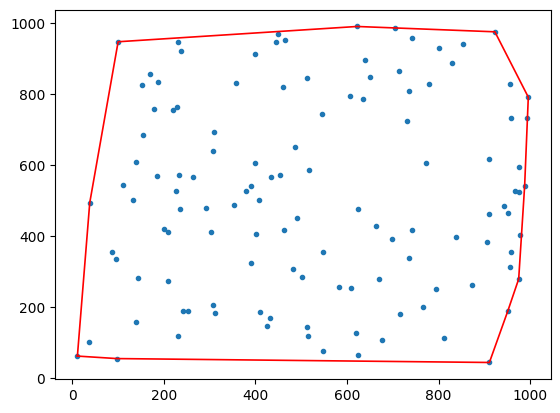

In [ ]:
import matplotlib.pyplot as plt
import time

# Find orientation
def orientation(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

# Function to check if the orientation is CounterClockWise (CCW)
def CCW(p1, p2, p3):
    return orientation(p1, p2, p3) < 0

def extremePoints(points):
    min_x = min(points, key=lambda p: p[0])  # Leftmost point
    max_x = max(points, key=lambda p: p[0])  # Rightmost point
    min_y = min(points, key=lambda p: p[1])  # Bottommost point
    max_y = max(points, key=lambda p: p[1])  # Topmost point
    return min_x, max_x, min_y, max_y

# Finds furthest point from line AB
def distance(A, B, p):
    return abs((p[1] - A[1]) * (B[0] - A[0]) - (B[1] - A[1]) * (p[0] - A[0]))

# QuickHull algorithm
def quickHull(points, A, B):
    if len(points) == 0:
        return []

    # Find the point that is furthest from the line AB
    furthest_point = points[0]
    for p in points:
        if distance(A, B, p) > distance(A, B, furthest_point):
            furthest_point = p

    # Determine the points that are on the left of A-furthestPoint & B-furthestPoint
    left_set = [p for p in points if CCW(A, p, furthest_point)]
    right_set = [p for p in points if CCW(furthest_point, p, B)]

    # Recursively find hull points on the left of the lines
    left_hull = quickHull(left_set, A, furthest_point)
    right_hull = quickHull(right_set, furthest_point, B)

    # Combine the points forming the convex hull
    return left_hull + [furthest_point] + right_hull

# Main function to compute the convex hull using the QuickHull algorithm
def quickHullConvexHull(points):
    # Find extreme points
    min_x, max_x, min_y, max_y = extremePoints(points)

    # Determine sets of points to the left/right/top/bottom of the extreme points
    left_set = [p for p in points if CCW(min_x, p, max_y)]
    top_set = [p for p in points if CCW(max_y, p, max_x)]
    right_set = [p for p in points if CCW(max_x, p, min_y)]
    bottom_set = [p for p in points if CCW(min_y, p, min_x)]

    # Start with the leftmost point
    hull = [min_x]

    # Recursively find hull points for each region
    hull += quickHull(left_set, min_x, max_y)
    hull += [max_y]
    hull += quickHull(top_set, max_y, max_x)
    hull += [max_x]
    hull += quickHull(right_set, max_x, min_y)
    hull += [min_y]
    hull += quickHull(bottom_set, min_y, min_x)

    return hull

# Function to plot the points and the convex hull
def plotConvexHull(points, hull):
    plt.figure()
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o', markersize=3)

    hull_points = hull + [hull[0]]  # Append the first point to close the hull
    plt.plot([p[0] for p in hull_points], [p[1] for p in hull_points], 'r-', linewidth=1.2)

    plt.show()


start_time = time.time()
hull = quickHullConvexHull(points)     # Calculate the convex hull
exec_time = time.time() - start_time

print(f"Execution time: {exec_time*1000} milliseconds\n")   # Print execution time
plotConvexHull(points, hull)    # Plot the points and the convex hull

### Ερώτημα 3

Για να συγκρίνουμε τις υλοποιήσεις, καταγράψαμε τους χρόνους εκτέλεσης των αλγορίθμων για 3 διαφορετικά τεστ (κάθε όμαδα τεστ είχε διαφορετικά σύνολα) για σύνολα 10, 100, 1000 και 10000 σημείων.

<u>Αυξητικός Αλγόριθμος:</u> Ο αλγόριθμος σε όλα τα τεστ έχει σταθερά τους χαμηλότερους χρόνος εκτέλεσης, ενώ όσο αυξάνεται το μέγεθος του συνόλου παρουσιάζει φυσιολογικές αυξήσεις στο χρόνο εκτέλεσης. Ακόμα και σε μεγάλα σύνολα οι χρόνοι εκτέλεσης του είναι πολύ χαμηλοί, κάτι που οφείλεται στην $O(nlogn)$ πολυπλοκότητα του.

<u>Αλγόριθμος Περιτυλίγματος:</u> Σε κάθε τεστ ο συγκεκριμένος αλγόριθμος είχε το χειρότερο χρόνο εκτέλεσης. Ειδικά για Ν = 1000 και Ν = 10000 αυξάνεται ραγδαία ο χρόνος που παίρνει για να ολοκληρωθεί η εκτέλεση του. Από τα δεδομένα αυτά και το γεγονός πως έχει πολυπλοκότητα $O(n^2)$ συμπεραίνουμε πως ο αλγόριθμος αυτός απευθύνεται κυρίως για μικρά σύνολα.

<u>Αλγόριθμος Διαίρει και Βασίλευε:</u> Ο αλγόριθμος αν και δεν έχει τους χαμηλότερους χρόνους εκτέλεσης όσο μεγαλώνει το μέγεθος του συνόλου, καταφέρνει να διαχειστεί μεγάλα μεγέθη σε φυσιολογικούς χρόνους χάρης τη πολυπλοκότητα $O(nlogn)$ που έχει.

<u>QuickHull Αλγόριθμος:</u> Ο συγκεκριμένος αλγόριθμος έχει σε γενικές γραμμές μικρούς χρόνους εκτέλεσης οι οποίοι, όπως και στον αυξητικό αλγόριθμο, αυξάνονται με φυσιολογικό τρόπο καθώς αυξάνεται το μέγεθος του συνόλου. Ακόμα και αν η πολυπλοκότητα του είναι $O(n^2)$, οι περιπτώσεις που ο αλγόριθμος παίρνει πολύ ώρα να εκτελεστεί είναι σπάνιες (μεγάλο μέρος του συνόλου πρέπει είναι μέρος του πριβλήματος - τα σημεία του συνόλου σχηματίζουν έναν κύκλο).

Οπότε, $avg\_t(incremental) < avg\_t(quickHull) < avg\_t(divide) < avg\_t(giftWrapping)$

In [ ]:
import numpy as np
import time

def testTiming(n_values, runs):
    print(f"{'n':>10} | {'Run':>4} | {'Incremental (ms)':>20} | {'Gift Wrapping (ms)':>20} | {'Divide&Conquer (ms)':>20} | {'QuickHull (ms)':>20}")
    print("-" * 110)

    for n in n_values:
        incremental_times = []
        gift_wrapping_times = []
        divide_times = []
        quickhull_times = []

        for run in range(1, runs+1):
            points = generateRandomPoints(n, n*10)

            # Measure time for incremental convex hull
            start_time = time.time()
            incrementalConvexHull(points)
            incremental_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            incremental_times.append(incremental_time)

            # Measure time for gift wrapping convex hull
            start_time = time.time()
            giftWrappingConvexHull(points)
            gift_wrapping_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            gift_wrapping_times.append(gift_wrapping_time)

            # Measure time for divide & conquer convex hull
            start_time = time.time()
            divideConvexHull(points)
            divide_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            divide_times.append(divide_time)

            # Measure time for quickhull convex hull
            start_time = time.time()
            quickHullConvexHull(points)
            quickhull_time = (time.time() - start_time) * 1000  # Convert to milliseconds
            quickhull_times.append(quickhull_time)

            # Print individual run times
            print(f"{n:>10} | {run:>4} | {incremental_time:>20.6f} | {gift_wrapping_time:>20.6f} | {divide_time:>20.6f} | {quickhull_time:>20.6f}")

        print("-" * 110)
        # Calculate average times
        avg_incremental = np.mean(incremental_times)
        avg_gift_wrapping = np.mean(gift_wrapping_times)
        avg_divide = np.mean(divide_times)
        avg_quickhull = np.mean(quickhull_times)

        # Print average times
        print(f"{'Average':>10} | {'-':>4} | {avg_incremental:>20.6f} | {avg_gift_wrapping:>20.6f} | {avg_divide:>20.6f} | {avg_quickhull:>20.6f}")
        print("-" * 110)

# List of n values to test
n_values = [10, 100, 1000, 10000]

# Run the test
testTiming(n_values, 3)

         n |  Run |     Incremental (ms) |   Gift Wrapping (ms) |  Divide&Conquer (ms) |       QuickHull (ms)
--------------------------------------------------------------------------------------------------------------
        10 |    1 |             0.052452 |             0.052214 |             0.048876 |             0.072241
        10 |    2 |             0.026464 |             0.038147 |             0.027657 |             0.084400
        10 |    3 |             0.034809 |             0.043869 |             0.037193 |             0.054836
--------------------------------------------------------------------------------------------------------------
   Average |    - |             0.037909 |             0.044743 |             0.037909 |             0.070492
--------------------------------------------------------------------------------------------------------------
       100 |    1 |             0.331163 |             0.716925 |             0.551224 |             0.425577
       

## Υλοποίηση Β: Γραμμικός Προγραμματισμός

Για την επίλυση του προβήματος γραμμικκού προγραμματισμού χρησιμοποιήσαμε τη συνάρτηση linprog από τη βιβλιοθήκη scipy. Πριν χρησιμοποιήσουμε τη συνάρτηση όμως πρέπει να κανονικοποιήσουμε τη μορφή του Γ.Π. και να το φέρουμε στη μορφή που χρειάζεται με βάση το documentation της συνάρτησης linprog.

* Μετατρέπουμε την αντικειμενική συνάρτηση από max σε min

* Πολλαπλασιάζουμε το δεύτερο και τρίτο περιορισμό με το $-1$

Μετά τη κανονικοποίηση δημιουργούμε τους πίνακες $A, b, c$ ορίζουμε ότι $x_1,x_2 > 0$ και και εκτελούμε τη *incrementalLP*.

Τελικά η λύση είναι $23.5$, για τις συντεταγμένες $[3.5, 0.5]$.

<u>incrementalLP:</u> Ο αλγόριθμος αυτός λύνει το πρόβλημα του γραμμικού προγραμματισμού εισάγοντας τους περιορισμούς έναν έναν. Αρχικά βρίσκει τη λύση για $(d+1)$ constraints (όπου $d$ ο αριθμός των μεταβλητών της αντικειμενικής συνάρτησης) και μετά ελέγχει αν η λύση αυτή καλύπτει τους υπόλοιπους περιορισμούς. Αν η τρέχων απάντηση δεν καλύπτει τον περιορισμό, βρίσκουμε την νέα απάντηση που τον καλύπτει.

<u>Παρατήρηση:</u> Για να παρουσιάσω τη γραφική παράσταση όπως ήθελα πήρα βοήθεια από [εδώ](https://stackoverflow.com/questions/57017444/how-to-visualize-feasible-region-for-linear-programming-with-arbitrary-inequali) (πρώτη απάντηση).

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Result class
class resultsNode:
    def __init__(self, solution, optimal_value, success):
        self.solution = solution
        self.optimal_value = optimal_value
        self.success = success

# check if current solution satisfies constraint
def constrainSatisfied2D(sol, A, b):
    return A[0]*sol[0] + A[1]*sol[1] <= b

# Incremental LP algorithm
def incrementalLP(c, A, b, bounds):
    n = len(b)   # number of constraints
    d = len(c)   # number of variables of LP problem

    A_included = []
    b_included = []
    for i in range(d+1):
        A_included.append(A[i])
        b_included.append(b[i])

    # Solve the initial problem with the first d+1 constraints
    res = linprog(c, A_ub=A_included, b_ub=b_included, bounds=bounds, method='highs')

    if not res.success:
        print("Infeasible")
        return resultsNode(None, None, False)

    result = resultsNode(res.x, res.fun, True)

    for i in range(d+1, n):

        if constrainSatisfied2D(result.solution, A[i], b[i]):
            # constraint satisfied, no need to find new solution
            print("SLAY")
            A_included.append(A[i])
            b_included.append(b[i])
            continue
        else:
            # unfesiable, find new solution
            print("BAGUETTE")
            # res = linprog(c, A_ub=A_included, b_ub=b_included, bounds=bounds, method='highs')

            reducedA = []
            reducedb = []

            for j in range(len(A_included)):
                reducedA.append([A_included[j][1] - (A[i][1]/A[i][0])])
                reducedb.append(b_included[j] + (b[i]/A[i][0]))

            # reducedc = c[1:]  # how do i update my objective function???

            # Update the objective function by substituting x1
            # c1 = c[0] / A[i][0]  # Coefficient for x1
            c2 = c[1] - (A[i][1]/A[i][0])
            reducedc = [c2]  # New objective function in terms of x2 only

            reduced_bounds = bounds[1:]

            print(reducedA)
            print(reducedb)
            print(reducedc)
            print(reduced_bounds)

            res = incrementalLP(reducedc, reducedA, reducedb, reduced_bounds)

            print(res.solution)
            print([(b[i]/A[i][0]) - (A[i][1]/A[i][0])*res.solution])

            if not res.success:
                print("Infeasible")
                return None

            A_included.append(A[i])
            b_included.append(b[i])

    result = resultsNode(res.x, res.fun, True)
    print("GAGGED")

    return result


# Objective function
c = [-5, -12]

# # Constraints
# A = [
#     [1, 3],
#     [1, -1],
#     [-7, 3],
#     [4, -9],
#     [3, -7],
#     [-2, 5]
# ]
# Constraints
A = [
    [1, -1],
    [-7, 3],
    # [4, -9],
    # [3, -7],
    [-2, 5],
    [1, 3]
]

# b = [5, 3, -1, 35, 32, 26]
b = [3, -1, 26, 5]

# Bounds for variables
bounds = [(0, None), (0, None)]

result = incrementalLP(c, A, b, bounds)

# Output results
if result.success:
    print("Optimal value:", -result.optimal_value)  # Chnage sign of the result because we used a minimization problem
    print("Optimal solution:", result.solution)
else:
    print("No feasible solution found.")


BAGUETTE
[[-4.0], [0.0], [2.0]]
[8.0, 4.0, 31.0]
[-15.0]
[(0, None)]
Infeasible
None


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

NameError: name 'result' is not defined

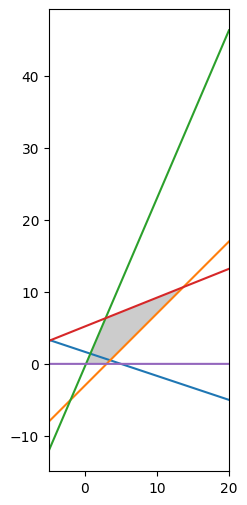

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))  # Set the figure size

# plot the feasible region
d = np.linspace(-5, 20, 500)
x,y = np.meshgrid(d,d)
# plt.imshow( ((x + 3*y <= 5) & (x - y <= 3) & (-7*x + 3*y <= -1) & (4*x - 9*y <= 35) & (3*x - 7*y <= 32) & (-2*x + 5*y <= 26) & (y >= 0)).astype(int) ,
plt.imshow( ((x - y <= 3) & (-7*x + 3*y <= -1) & (4*x - 9*y <= 35) & (-2*x + 5*y <= 26) & (y >= 0)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.2);

# plot the lines defining the constraints (for x2 we use y)
x = np.linspace(-5, 20, 2000)
# x + 3y <= 5
y1 = (x-5)/(-3.0)
# -x + y >= -3
y2 = x -3.0
# 7x -3y >= 1
y3 = (7*x-1.0)/(3.0)
# 4x - 9y <= 35
# y4 = (4*x-35.0)/(9.0)
# 3x - 7y <= 32
# y5 = (3*x-32.0)/(7.0)
# -2x + 5y <= 26
y6 = (2*x+26.0)/(5.0)
# y >= 0
y7 = x*0


# Plot lines
plt.plot(x, y1, label=r'$x_1 + 3x_2 \leq 5$')
plt.plot(x, y2, label=r'$-x_1 + x_2 \geq -3$')
plt.plot(x, y3, label=r'$7x_1 - 3x_2 \geq 1$')
# plt.plot(x, y4, label=r'$4x_1 - 9x_2 \leq 35$')
# plt.plot(x, y5, label=r'$3x_1 - 7x_2 \leq 32$')
plt.plot(x, y6, label=r'$-2x_1 + 5x_2 \leq 26$')
plt.plot(x, y7, label=r'$x_1, x_2 \geq 0$')

# Plot result of linear programming
plt.plot(result.solution[0], result.solution[1], 'o', markersize=6, color='red')
plt.text(result.solution[0] + 0.4, result.solution[1], f'({result.solution[0]:.1f}, {result.solution[1]:.1f})', color='red', fontsize=10)

# Plot config
plt.xlim(-3,20)
plt.ylim(-3,20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   # Legend placement
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

## Υλοποίηση Γ: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay

### Ερώτημα 1

Για να απεικονίσουμε την αντιστοιχεία ανάμεσα στην τριγωνοποίηση Delaunay
και στο διάγραμμα Voronoi χρησιμοποιούμε τη βιβλιοθήκη scipy που έχει έτοιμες τις συναρτήσεις για τον υπολογισμό τους. Για να τα αναπαραστήσουμε σχηματικά χρησιμοποιούμε τη βιβλιοθήκη matplotlib και τη συνάρτηση voronoi_plot_2d. Η τριγωνοποίηση Delaunay χρησιμοποιεί πορτοκαλί χρώμα και το διάγραμμα Voronoi μπλε.

Το πως συνδέονται αυτά τα δύο το παρατηρούμε με διάφορους τρόπους από το σχήμα.

* Οι κορυφές των τριγώνων Delaunay είναι και εστίες των κελιών Voronoi (στο σχήμα έχουμε 7 κουρφές = 7 εστίες = 7 κελιά)

*  Κάθε κορυφή Voronoi αντιστοιχεί σε ένα τρίγωνο Delaunay (στο σχήμα έχουμε 6 τρίγωνα = 6 κορυφές)

* Κάθε ζεύγος γειτονικών κελιών (δηλαδή ακμή Voronoi) αντιστοιχεί σε μία ακμή
Delaunay, που ορίζεται από τις δύο εστίες (στο σχήμα έχουμε 12 ακμές Voronoi = 12 ακμές Delaunay)

* Το κέντρο των κύκλων που δημιουργούν τα τρίγωνα Delaunay είναι κορυφές Voronoi

*  Οι κύκλοι αυτοί αν σχηματίζονται από 3 κορυφές Delaunay δεν περιέχουν καμία εστία Volonoi μέσα τους

Από τα παραπάνω καταλαβαίνουμε πως η τριγωνοποίηση Delaunay είναι το δυϊκό του διαγράμματος Voronoi και το αντίθετο, δηλαδή κάθε διάγραμμα Voronoi μπορεί να μετατραπεί σε τριγωνοποίηση Delaunay και αντίστροφα.

Points:
[(2, 6), (5, 2), (7, 8), (9, 5), (14, 7), (12, 1), (17, 4)]


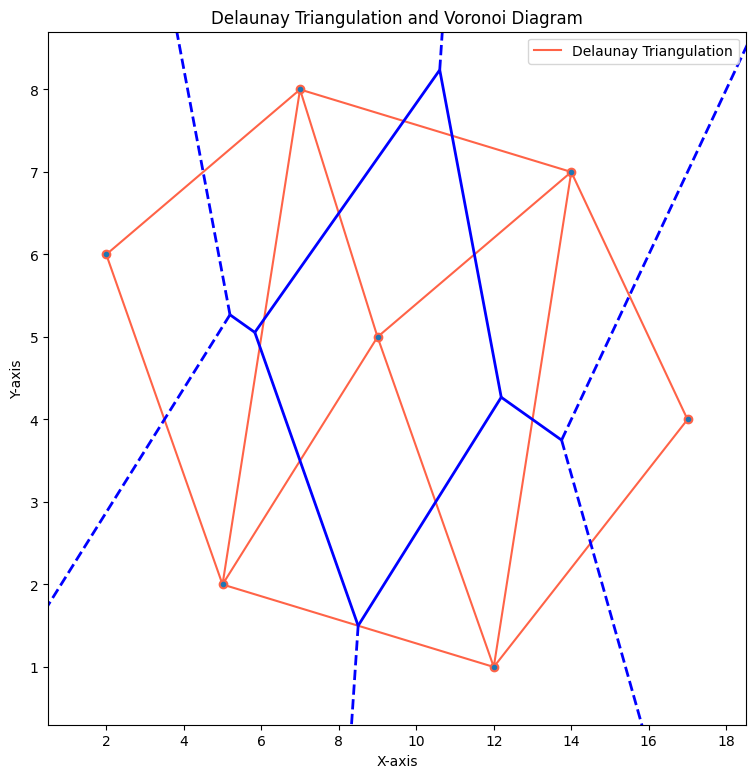

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

def plotVoronoiDelaunay(n=None):
    # Use example
    points = [(2, 6), (5, 2), (7, 8), (9, 5), (14, 7), (12, 1), (17, 4)]

    # Or generate n points
    if n:
      points = generateRandomPoints(n, n*10)   # (number of points, upper bound)


    print("Points:")
    print(points)
    points = np.array(points)   # Convert to numpy array

    # Compute Delaunay triangulation
    delaunay = Delaunay(points)

    # Compute Voronoi diagram
    voronoi = Voronoi(points)

    # Plot the Delaunay triangulation
    plt.figure(figsize=(9, 9))
    plt.triplot(points[:, 0], points[:, 1], delaunay.simplices, color='tomato', label="Delaunay Triangulation")
    plt.plot(points[:, 0], points[:, 1], 'o', color='tomato')

    # Plot the Voronoi diagram
    voronoi_plot_2d(voronoi, ax=plt.gca(), show_vertices=False, line_colors='blue', line_width=2)

    plt.title("Delaunay Triangulation and Voronoi Diagram")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    # plt.grid(True)
    plt.show()

plotVoronoiDelaunay()

### Ερώτημα 2

Λόγω της σχέσης που έχουν το διάγραμμα Voronoi και η τριγωνοποίηση Delaunay (το ένα είναι δυϊκό του άλλου) οι αλγόριθμοι κατασκευής τους είναι πολύ κοντά μεταξύ τους, άρα και η πολυπλοκότητα τους είναι παρόμοια ($O(nlogn)$). Από τα τεστ που κάνουμε κιόλας, παρατηρούμε πως κατά μέσο όρο έχουν παρόμοιους χρόνους επίλυσης, ενώ όσο μεγαλώνει το $N$ παρατηρούμε παρόμοια αύξηση στο χρόνο εκτέλεσης και των δύο.

In [ ]:
import numpy as np
import time
from scipy.spatial import Delaunay, Voronoi

def testTiming(n_values, runs=3):
    print(f"{'n':>10} | {'Run':>4} | {'Voronoi (s)':>20} | {'Delaunay (s)':>20}")
    print("-" * 63)

    for n in n_values:
        voronoi_times = []
        delaunay_times = []

        for run in range(1, runs + 1):
            points = generateRandomPoints(n, n * 10)

            # Measure time for Voronoi diagram
            start_time = time.time()
            Voronoi(points)
            voronoi_time = (time.time() - start_time)
            voronoi_times.append(voronoi_time)

            # Measure time for Delaunay triangulation
            start_time = time.time()
            Delaunay(points)
            delaunay_time = (time.time() - start_time)
            delaunay_times.append(delaunay_time)

            # Print individual run times
            print(f"{n:>10} | {run:>4} | {voronoi_time:>20.6f} | {delaunay_time:>20.6f}")

        # Calculate average times
        avg_voronoi = np.mean(voronoi_times)
        avg_delaunay = np.mean(delaunay_times)

        print("-" * 63)
        # Print average times
        print(f"{'Average':>10} | {'-':>4} | {avg_voronoi:>20.6f} | {avg_delaunay:>20.6f}")
        print("-" * 63)

# List of n values to test
n_values = [10, 100, 1000, 10000]

# Run the test with averages over 3 runs
testTiming(n_values, runs=3)


         n |  Run |          Voronoi (s) |         Delaunay (s)
---------------------------------------------------------------
        10 |    1 |             0.001275 |             0.000700
        10 |    2 |             0.000746 |             0.000484
        10 |    3 |             0.000479 |             0.000313
---------------------------------------------------------------
   Average |    - |             0.000834 |             0.000499
---------------------------------------------------------------
       100 |    1 |             0.003377 |             0.000850
       100 |    2 |             0.001791 |             0.000769
       100 |    3 |             0.002236 |             0.001129
---------------------------------------------------------------
   Average |    - |             0.002468 |             0.000916
---------------------------------------------------------------
      1000 |    1 |             0.009975 |             0.004908
      1000 |    2 |             0.009458

## Υλοποίηση Δ: Γεωμετρική αναζήτηση

### 1. Υλοποίηση Range Tree

Παράγουμε τυχαία σημεία για το σύνολο P (ή χρησιμοποιούμε το έτοιμο σύνολο στο από κάτω μπλοκ κώδικα)

In [ ]:
import random

# Generate n unique random points
def generateUniquePoints(n, upper_bound, lower_bound=0):
    if upper_bound - lower_bound + 1 < n:
        raise ValueError("Range too small for the number of unique points requested.")

    # Generate unique x and y values
    x_values = random.sample(range(lower_bound, upper_bound + 1), n)
    y_values = random.sample(range(lower_bound, upper_bound + 1), n)

    # Create pairs
    points = []
    for i in range(n):
        points.append((x_values[i], y_values[i]))

    return points

points = generateUniquePoints(10, 15)   # Generate unique random points

print("Points:")
print(", ".join(map(str, points)))

Points:
(3, 0), (12, 2), (2, 14), (0, 5), (1, 13), (14, 8), (5, 6), (13, 15), (10, 7), (15, 11)


<u>buildRangeTree:</u> Βασική συνάρτηση που λειτουργεί αναδρομικά για τη κατασκευή του εκτασιακού, βασισμένη σε ψευδοκώδικα από τις διαφάνειες του μαθήματος. Αρχικά βρίσκουμε το συνοδευόμενο δέντρο για το σύνολο που μας δίνετε από τη συνάρτηση *buildAssociatedTree* και έπειτα ελέγχουμε αν το σύνολο αποτελείται από ένα στοιχείο ή παραπάνω:
* Αν αποτελείται από ένα στοιχείο, δημιουργούμε ένα leaf node (περιέχει το στοιχείο και το συνοδευτικό του δέντρο μόνο) και το επιστρέφουμε.

* Αν αποτελείται απο δύο στοιχεία δημιουργούμε έναν ενδιάμεσο κόμβο που περιέχει τη συντεταγμένη x του πρώτου στοιχείου, το συνοδευόμενο του δέντρο και τους κόμβους παιδιά του που είναι τα leaf nodes των δύο στοιχείων.

* Αν αποτελείται από παραπάνω στοιχεία, σπάμε το σύνολο σε δύο υποσύνολα και δημιουργούμε έναν ενδιάμεσο κόμβο που περιέχει τη συντεταγμένη x του τελεταίου στοιχείου του πρώτου υποσυνόλου. Αυτός έχει για παιδιά τους κόμβους που δημιουργούνται από τα δύο υποσύνολα αναδρομικά μέσω της ίδιας συνάρτησης.

<u>buildAssociatedTree:</u> H συνάρτηση για τη κατασκευεί του συνοδευόμενου δέντρου χρησιμοποιεί την ίδια λογική με τη κατασκευή του κανονικού δέντρου με τη μόνη διαφορά πως η ταξινόμηση γίνεται με τη y συντεταγμένη αυτή τη φορά.

<u>plotTreeGraph, rotate_pos_90_degrees, visualize_trees:</u> Συναρτήσεις για να αναπαραστήσουμε σχηματικά το εκτασιακό δέντρο και το συνοδευτικό δέντρο του αρχικού συνόλου.



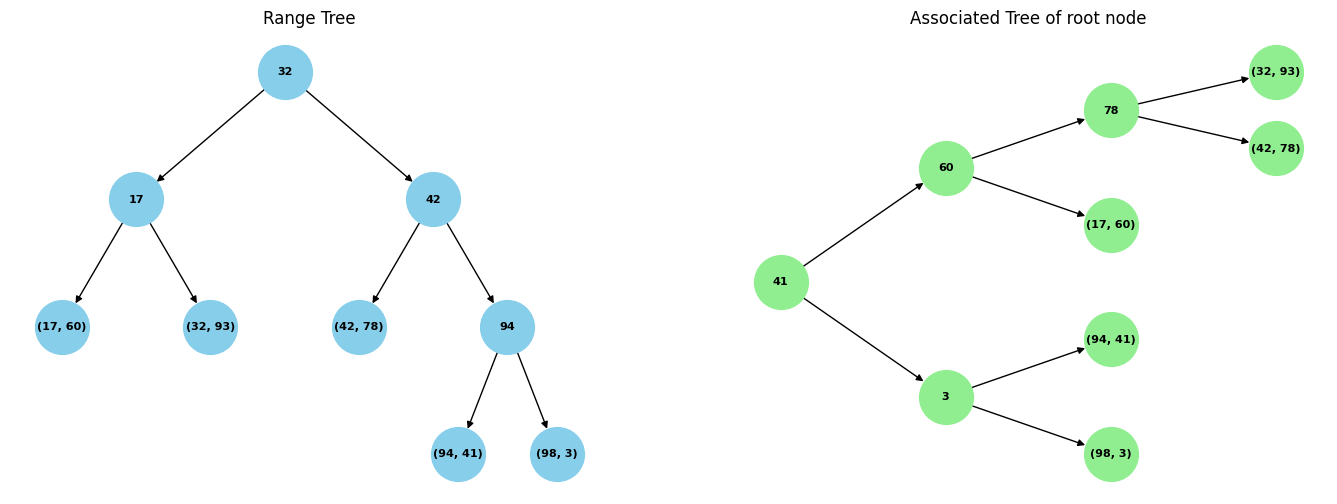

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Node class
class Node:
    def __init__(self, point=None, left=None, right=None, associated_tree=None):
        self.point = point    # split x-coordinate (if node has subtrees) or point (if it's a leaf)
        self.left = left
        self.right = right
        self.associated_tree = associated_tree

# Recursive function to build associated tree (sort by y-coordinate)
def buildAssociatedTree(points):
    if not points:
        return None

    points = sorted(points, key=lambda point: (point[1], point[0])) # Sort by y-coordinate first, then by x-coordinate
    split_n = len(points) // 2    # Find split point

    if len(points) == 1:    # If only one element left, create a leaf node
        node = Node(points[0])
    elif len(points) == 2:  # If two elements left, create two leaf nodes
        left  = Node(points[0])
        right = Node(points[1])

        node  = Node(points[0][1], left, right)  # Create node with split y-coordinate
    else:   # Else, split sum in half and call function recursivly
        left  = buildAssociatedTree(points[:split_n])
        right = buildAssociatedTree(points[split_n:])

        node  = Node(points[split_n-1][1], left, right)  # Create node with split y-coordinate

    return node

# Recursive function to build range tree (sort by x-coordinate)
def buildRangeTree(points):
    if not points:
        return None

    # Find split point
    points = sorted(points, key=lambda point: (point[0], point[1])) # Sort by x-coordinate first, then by y-coordinate
    split_n = len(points) // 2

    # Create associated tree (y sorted)
    associated_tree = buildAssociatedTree(points)

    if len(points) == 1:    # If only one element left, create a leaf node
        node  = Node(points[0], associated_tree=associated_tree)
    elif len(points) == 2:  # If two elements left, create two leaf nodes
        left  = Node(points[0], associated_tree=buildAssociatedTree([points[0]]))
        right = Node(points[1], associated_tree=buildAssociatedTree([points[1]]))

        node  = Node(points[0][0], left, right, associated_tree)  # Create node with split x-coordinate
    else:   # Else, split sum in half and call function recursivly
        left  = buildRangeTree(points[:split_n])
        right = buildRangeTree(points[split_n:])

        node  = Node(points[split_n-1][0], left, right, associated_tree)  # Create node with split x-coordinate

    return node

# Recursive function to plot the tree graph
def plotTreeGraph(node, pos=None, x=0, y=0, layer=1, G=None):
    # Initialization
    if pos is None:
        pos = {}
    if G is None:
        G = nx.DiGraph()

    # Add root node to graph
    pos[node.point] = (x, y)
    G.add_node(node.point)

    # Recursivly add children
    if node.left:
        G.add_edge(node.point, node.left.point)
        plotTreeGraph(node.left, pos=pos, x=x-1/layer, y=y-1, layer=layer+1, G=G)

    if node.right:
        G.add_edge(node.point, node.right.point)
        plotTreeGraph(node.right, pos=pos, x=x+1/layer, y=y-1, layer=layer+1, G=G)

    return G, pos

# Make associated tree rotate 90 degrees to the left
def rotate_pos_90_degrees(pos):
    return {k: (-v[1], v[0]) for k, v in pos.items()}

# Function to visualize the trees
def visualize_trees(range_tree):
    # Plot Trees
    G_range, pos_range = plotTreeGraph(range_tree)
    G_associated, pos_associated = plotTreeGraph(range_tree.associated_tree)

    # Rotate the associated tree
    pos_associated = rotate_pos_90_degrees(pos_associated)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(17, 6))

    # Range Tree
    nx.draw(G_range, pos_range, ax=axes[0], with_labels=True, labels={n: f"{n}" for n in G_range.nodes()},
            node_size=1500, node_color="skyblue", font_size=8, font_weight="bold")
    axes[0].set_title("Range Tree")

    # Associated Tree
    nx.draw(G_associated, pos_associated, ax=axes[1], with_labels=True, labels={n: f"{n}" for n in G_associated.nodes()},
            node_size=1500, node_color="lightgreen", font_size=8, font_weight="bold")
    axes[1].set_title("Associated Tree of root node")

    plt.show()

# Sum used part 2 of the problem (visualization):
# points = [(2, 3), (4, 7), (5, 1), (6, 9), (7, 4), (8, 2)]

# Generate random points (run above block of code first)
points = generateUniquePoints(5, 100)   # (number of points, upper bound)

range_tree = buildRangeTree(points)   # Build range tree
visualize_trees(range_tree)           # Visualize trees


### 2. Οπτικοποίηση των βημάτων

Το σύνολο που θα χρησιμοποιήσουμε είναι το,
$S = [(2, 3), (4, 7), (5, 1), (6, 9), (7, 4), (8, 2)]$

Κάθε βήμα περιέχει και το συνδετικό δέντρο για το παρόν σύνολο.



**1ο βήμα:** Διάσπαση αρχικού συνόλου σε δύο υποσύνολα. Έτοιμο να καλέσει τη συνάρτηση αναδρομικά για να κατασκευάσει τα υπόδεντρα.

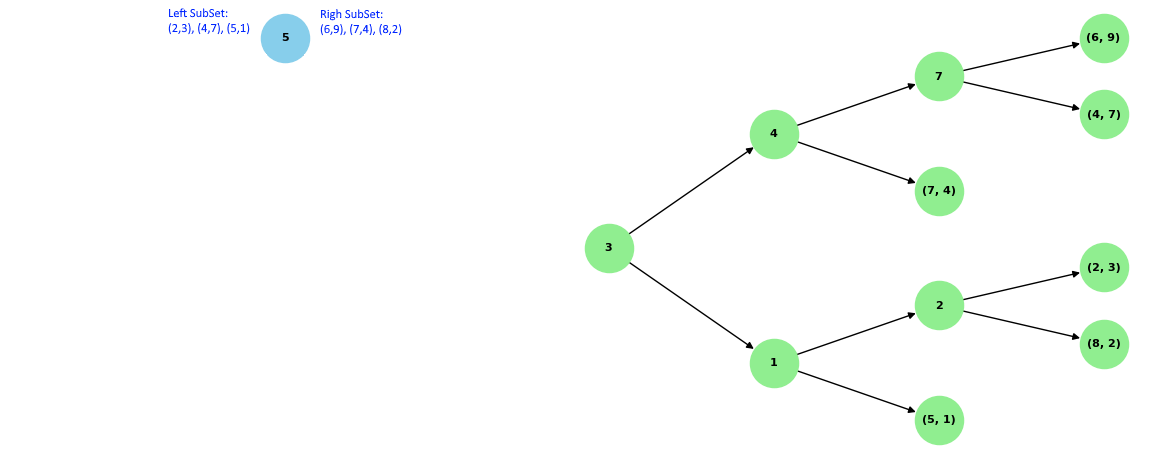

**2ο βήμα:** Κατασκευή αριστερού υπόδεντρου, διάσπαση πάλι του συνόλου στα δύο.

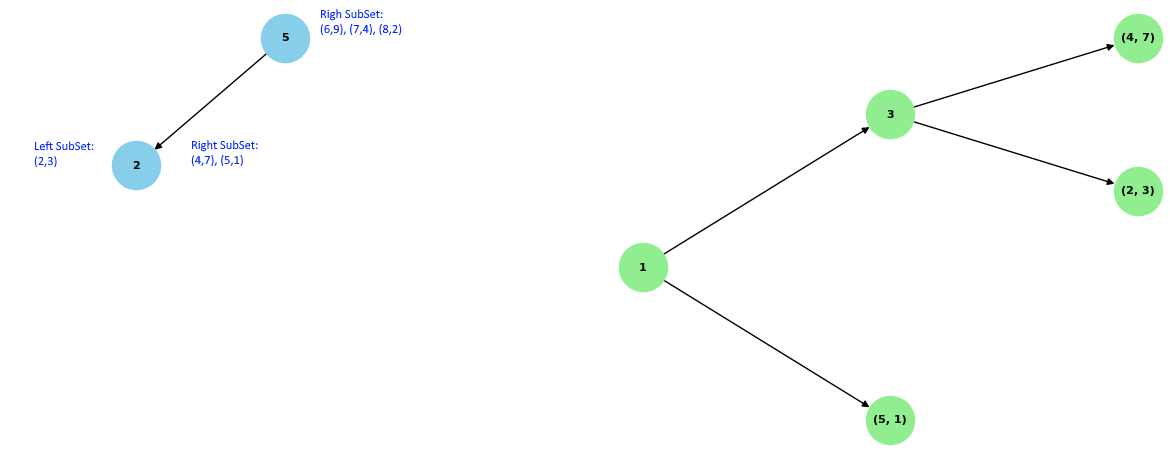

**3ο βήμα:** Ο αριστερός κόμβος είναι leaf node άρα περιέχει μόνο το στοιχείο και το συνδευτικό του δέντρο. Το δεξιά υπόδεντρο έχει δύο μόνο στοιχεία, άρα τα παιδιά του θα είναι leaf nodes.

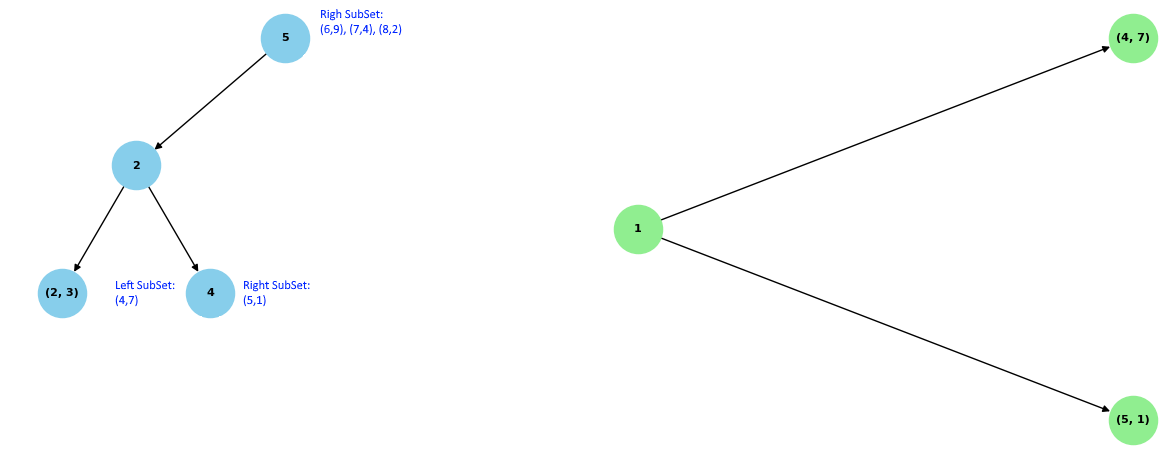

**4o βήμα:** Παρατηρούμε πως το leaf node με το στοιχείο $[5,1]$ έχει για συνδευτικό δέντρο μια δομή που περιέχει μόνο ένα στοιχείο, τον εαυτό του.

Διασχίσαμε το αριστερό υπόδεντρο, συνεχίζουμε με το δεξιά.

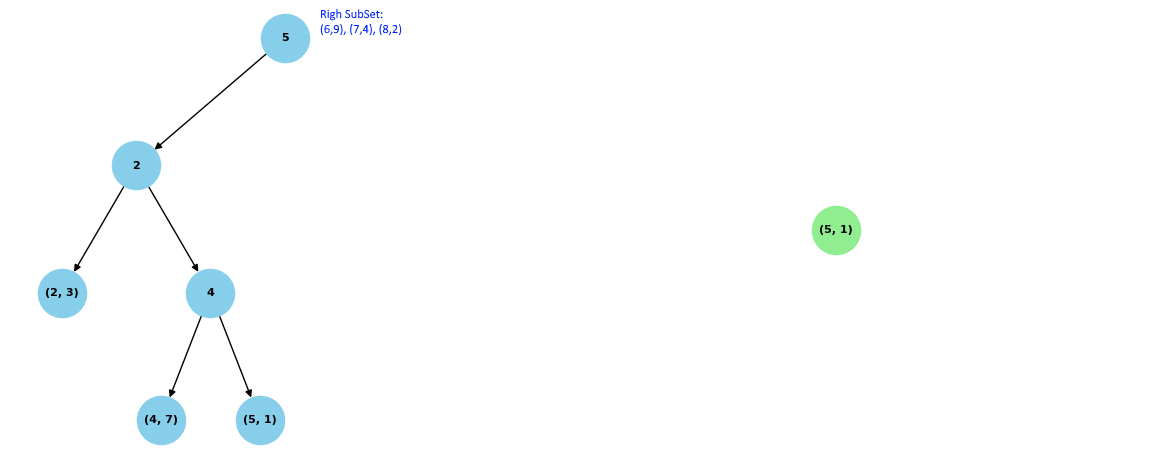

**5ο βήμα:** Σπάμε το σύνολο σε δύο υποσύνολα και συνεχίζουμε αναδρομικά.

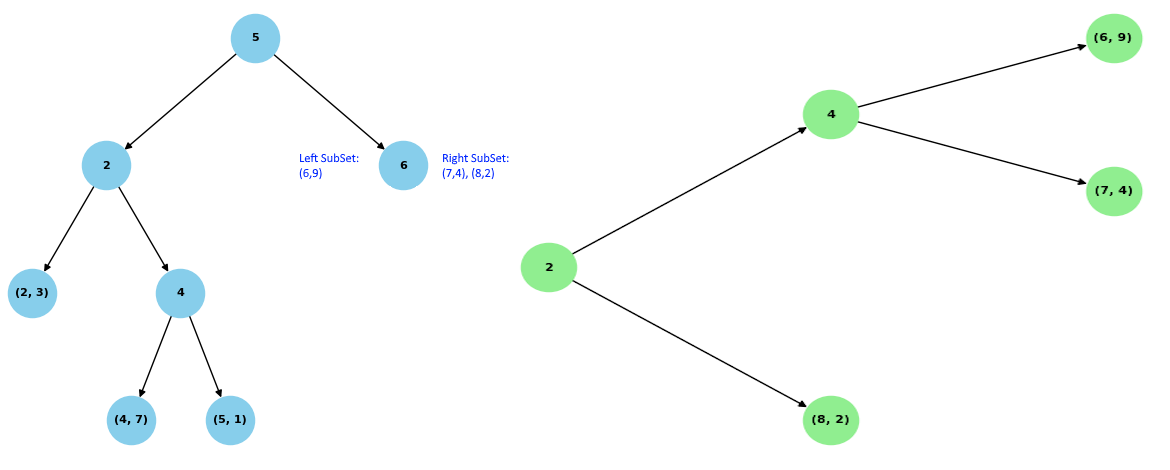

**6ο βήμα:** Ίδιο με το *3ο βήμα*.

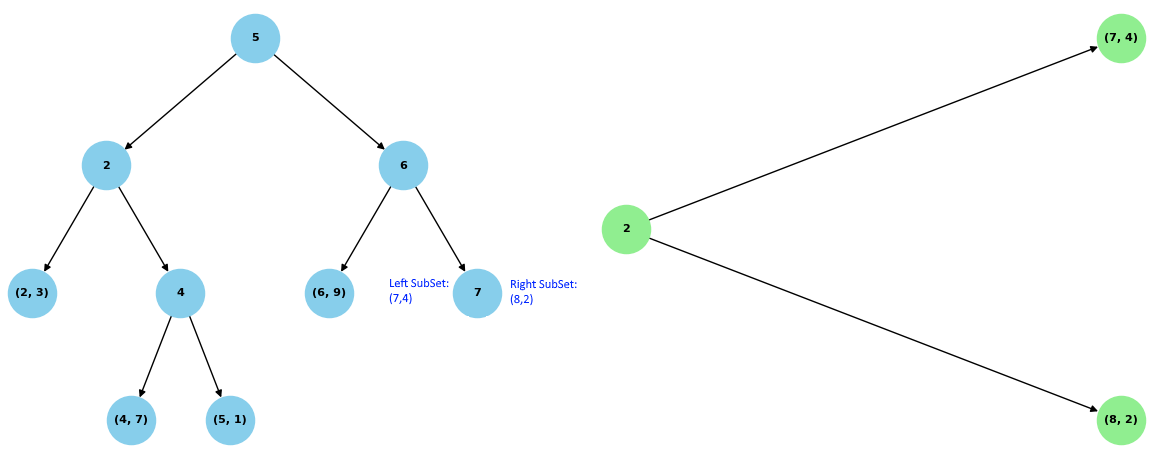

**7ο βήμα:** Ίδιο με το *4ο βήμα*.

Διασχίσαμε και το αριστερό και το δεξιά υπόδεντρο, οπότε το εκτασιακό μας δέντρο είναι έτοιμο. Οι αναδρομικές συναρτήσειες από τη νεότερη έως τη πιο παλιά τερματίζονται μία μία και επιστρέφουν το υπόδεντρο που κατασκεύασαν. Η αρχική συνάρτηση τερματίζεται και επιστρέφει το ολοκληρωμένο δέντρο.

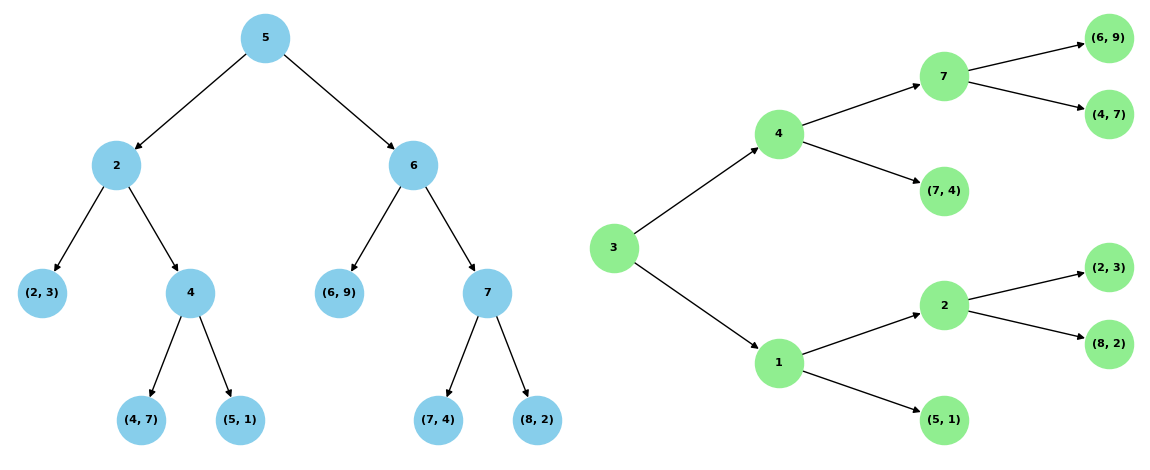

### 3. Υλοποίηση αλγόριθμου ορθογώνιας γεωμετρικής αναζήτησης & 4. Εκτέλεση αλγορίθμου για 120 σημεία

<u>orthogonalRangeTreeSearch:</u> Βασική συνάρτηση που μας βοηθά να βρούμε τα στοιχεία που είναι εντός του χώρου αναζήτησης. Βρίσκει το κόμβο διαχωρισμού για τις συντεταγμένες x, x' και έπειτα διασχίζει το δέντρο αριστερά και δεξιά ελέγχοντα κάθε φορά αν έχει βγει εκτός του χώρου αναζήτησης. Αν κάποιο υπόδεντρο είναι ολόκληρο εντός των x, x' ελέγχει μέσω της *rangeQuery1D* αν είναι και εντός των y, y'. Επιστρέφει τα αποτελέσματα της συνάρτησης αυτής, ή τα σημεία που βρίσκονται σε leadf nodes και είναι εντός των ορίων.

<u>rangeQuery1D:</u> Συνάρτηση που καλείται από την *orthogonalRangeTreeSearch* για να ελέγξει αν τα στοιχεία του συνοδευτικού δέντρου είναι εντός των συντεταγμένων y, y'. Αρχικά βρίσκει το κόμβο διαχωρισμού και έπειτα διασχίζει το δέντρο αριστερά και δεξιά μέχρι να φτάσει σε κάποιο leaf node. Αν κάποιο υπόδεντρο είναι ολόκληρο εντός των y, y' τότε επιστρέφουμε όλα τα σημεία του.

<u>splitNodeSearch:</u> Συνάρτηση βασισμένη στο ψευδοκώδικα από τις διαφάνειες του μαθήματος για την εύρεση του κόμβου διαχωρισμού τόσο στο βασικό όσο και στο συνοδευτικό δέντρο.

<u>plotPointsAndSearchRange:</u> Συνάρτηση οπτικοποίησης του συνόλου, του χώρου αναζήτησης και των αποτελεσμάτων.

Οι υπόλοιπες συναρτήσεις έχουν σχόλια για τη καλύτερη κατανόηση τους.

---

H συνάρτηση *generateUniquePoints* παράγει 120 τυχαία σημεία (αν θέλουμε μπορούμε να αλλάξουμε το μέγεθος των στοιχείων), πάνω στα οποία κάνουμε την αναζήτηση για $250 \leq x \leq 750, 250 \leq y \leq 750$. Συγκρίνοντας τη λίστα των αποτελεσμάτων και παρατηρώντας το σχήμα, καταλήγουμε στο συμπέρασμα πως η συνάρτηση βρίσκει όλα τα στοιχεία που βρίσκονται εντός του χώρου αναζήτησης.

Points:
[(328, 288), (613, 778), (386, 806), (593, 903), (44, 761), (2, 653), (658, 660), (76, 716), (564, 173), (487, 422), (354, 862), (549, 497), (588, 443), (368, 113), (551, 86), (208, 640), (100, 585), (814, 69), (816, 880), (391, 706), (142, 465), (162, 797), (378, 107), (405, 589), (493, 724), (337, 25), (422, 162), (248, 47), (531, 683), (198, 788), (636, 983), (624, 94), (121, 993), (523, 876), (223, 893), (502, 42), (975, 810), (432, 904), (346, 456), (971, 743), (912, 271), (276, 36), (219, 865), (891, 365), (80, 819), (873, 697), (540, 256), (472, 439), (660, 70), (55, 85), (483, 463), (143, 986), (220, 389), (65, 562), (63, 851), (697, 875), (228, 172), (46, 231), (702, 46), (641, 409), (461, 436), (406, 170), (78, 16), (870, 393), (40, 337), (333, 758), (943, 612), (819, 144), (610, 579), (813, 278), (599, 592), (598, 59), (49, 781), (218, 475), (68, 676), (596, 925), (125, 547), (185, 632), (587, 255), (348, 906), (578, 262), (784, 718), (253, 638), (296, 448), (145, 16

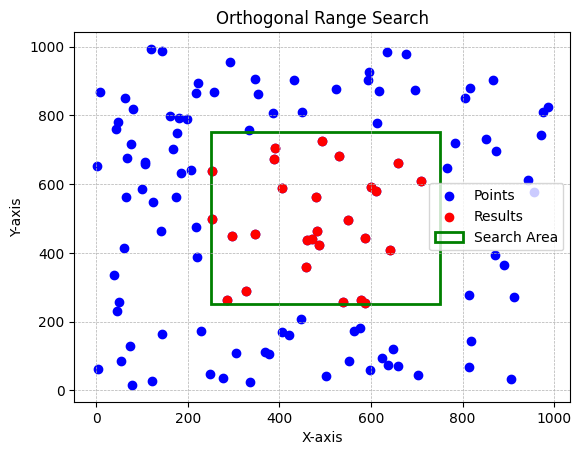

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### HELPER FUNCTIONS ###

# Function to check if point is inside the search area (1 dimension)
def inBounds1D(node, y1, y2):
    if y1 <= node.point[1] <= y2:
        return True
    else:
        return False

# Function to check if point is inside the search area (2 dimensions)
def inBounds2D(node, x1, x2, y1, y2):
    if x1 <= node.point[0] <= x2 and y1 <= node.point[1] <= y2:
        return True
    else:
        return False

# Function to check if node is a leaf node🍃
def isNodeLeaf(node):
    if node.left is None and node.right is None:
        return True
    else:
        return False

### ALGORITHM RELATED FUNCTIONS ###

# Recursive function to find split node
def splitNodeSearch(node, lower_bound, upper_bound):
    while not isNodeLeaf(node) and (upper_bound <= node.point or lower_bound > node.point):
        if upper_bound <= node.point:
          node = node.left
        else:
          node = node.right

    return node

# Returns all points of tree
def treeReport(tree):
    if tree is None:
        return []

    if isNodeLeaf(tree):
        return [tree.point]
    else:
        return treeReport(tree.left) + treeReport(tree.right)

# Perform a 1D range query to find all points within the specified y-range in a 1D range tree
def rangeQuery1D(node, y1, y2): # (node, lower bound, upper bound)
    split_node = splitNodeSearch(node, y1, y2)  # Find the split node
    results = []  # List to store the results

    if isNodeLeaf(split_node):  # If node is a leaf
        if inBounds1D(split_node, y1, y2):  # Check if point is in bounds
            return [split_node.point]
    else:
        # Traverse the left subtree from the split node
        node = split_node.left
        while not isNodeLeaf(node):
            if y1 <= node.point:      # If the current node's point is within the y-range on the left side
                results += treeReport(node.right) # Report all points in the right subtree (which are fully in range)
                node = node.left      # Move to the left child
            else:
                node = node.right     # Otherwise, move to the right child

        if inBounds1D(node, y1, y2):  # Check if point is in bounds
            results.append(node.point)

        # Traverse the right subtree from the split node
        node = split_node.right
        while not isNodeLeaf(node):
            if node.point < y2:       # If the current node's point is within the y-range on the right side
                results += treeReport(node.left)  # Report all points in the left subtree (which are fully in range)
                node = node.right     # Move to the right child
            else:
                node = node.left      # Otherwise, move to the left child

        if inBounds1D(node, y1, y2):  # Check if point is in bounds
            results.append(node.point)

    return results

# Perform a 2D range query to find all points within the specified x and y bounds in a range tree
def orthogonalRangeTreeSearch(node, x1, x2, y1, y2):
    if node is None:
        return []

    split_node = splitNodeSearch(node, x1, x2)  # Find the split node
    results = []  # List to store the results

    if isNodeLeaf(split_node):  # If node is a leaf
        if inBounds2D(split_node, x1, x2, y1, y2):  # Check if point is in bounds
            return [split_node.point]
    else:
        # Traverse the left subtree from the split node
        node = split_node.left
        while not isNodeLeaf(node):
            if x1 <= node.point:      # If the current node's point is within the x-range on the left side
                results += rangeQuery1D(node.right.associated_tree, y1, y2) # Report all points in the right subtree (which are fully in range)
                node = node.left      # Move to the left child
            else:
                node = node.right     # Otherwise, move to the right child

        if inBounds2D(node, x1, x2, y1, y2):  # Check if point is in bounds
            results.append(node.point)

        # Traverse the right subtree from the split node
        node = split_node.right
        while not isNodeLeaf(node):
            if node.point < x2:       # If the current node's point is within the x-range on the right side
                results += rangeQuery1D(node.left.associated_tree, y1, y2)  # Report all points in the left subtree (which are fully in range)
                node = node.right     # Move to the right child
            else:
                node = node.left      # Otherwise, move to the left child

        if inBounds2D(node, x1, x2, y1, y2):  # Check if point is in bounds
            results.append(node.point)

    return results

# Plot points, show orthogonal search area and highlight results
def plotPointsAndSearchRange(points, x1, x2, y1, y2, results=None):
    fig, ax = plt.subplots()

    # Plot all points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    ax.scatter(x_coords, y_coords, color='blue', label='Points')

    # Highlight the points that fall within the search range
    if results:
        result_x = [point[0] for point in results]
        result_y = [point[1] for point in results]
        ax.scatter(result_x, result_y, color='red', label='Results')

    # Draw the search range as a rectangle
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='green', facecolor='none', label='Search Area')
    ax.add_patch(rect)

    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Orthogonal Range Search')
    ax.legend()

    # Add background grid
    ax.grid(True, linestyle='--', linewidth=0.5)

    plt.show()


# Use example
# points = [(2, 3), (4, 7), (5, 1), (6, 9), (7, 4), (8, 2)]

# Or generate random points (run associated block of code first)
points = generateUniquePoints(120, 1000)  # (number of points, upper bound)

print("Points:")
print(points)

root = buildRangeTree(points)   # Build range tree (run above block of code first)

# Perform orthogonal range search
lower_x, upper_x = 250, 750
lower_y, upper_y = 250, 750
results = orthogonalRangeTreeSearch(root, lower_x, upper_x, lower_y, upper_y)

# List and graph results
print("\nSearch results:")
if not results:
    print("No points found within the search area.")
else:
    print(", ".join(map(str, [point for point in results])))

plotPointsAndSearchRange(points, lower_x, upper_x, lower_y, upper_y, results)